<a href="https://colab.research.google.com/github/ardilalukita14/Magang-Kominfo/blob/main/Project_Magang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Library yang Dibutuhkan**

In [69]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Proses Scraping, Stemming, Stop Words Google News**

In [74]:
# import library 
from pygooglenews import GoogleNews
import csv
from newspaper import Article
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('punkt')
from pprint import pprint
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import pandas as pd
from time import sleep
#from google.colab import files


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
f = open("stop words.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [113]:

# Scrapping Function to get google news (title, link)
gn = GoogleNews(lang = 'id',country = 'ID') 
def get_titles(search):
    stories = []

    # setting tanggal
    start_date = datetime.date(2022,7,1)
    end_date = datetime.date(2022,7,16)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'), when = '1d')
        newsitem = result['entries']
   # stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    for item in newsitem:
        url=item.link
        try:
            article = Article(url)
            article.download()
            article.parse()
            story = {
                'Title' : item.title,
                'Read more' : item.link,
                'Time' : item.published,
                'Article' : article.text,
                'Stemming' : stemmer.stem(article.text),
                'WordTokens' :(word_tokenize(stemmer.stem(article.text))),
                'WordsStop' : [w for w in word_tokenize(article.text) if not w in stopword_list ],
                'TotalKata' : len([w for w in word_tokenize(article.text) if not w in stopword_list ])
                }
            if article.title=="Are you a robot?" or article.title=="Subscribe to read" :
                continue
            else:
                stories.append(story)
                i=i+1
                print(i,'',article.title)
                sleep(1)
        except:
              pass
        stories.append(story)
        sleep(0)
    return stories


In [114]:
# Process Summarize Goolge News Article + Sentiment Analysis of Google News
def summarize_artcle(url):
    article = Article(url)
    # Set up 
    article.download()
    article.parse()
    # Download Punkt
    article.download('punkt')
    article.nlp()
    summary = article.summary

    analysis = TextBlob(article.text)
    sentiment_a =""
    if analysis.polarity > 0:
      sentiment_a="positif"
    elif analysis.polarity < 0:
      sentiment_a="negatif"
    else:
       sentiment_a="netral"

    return summary,sentiment_a

In [115]:
#Function to save a list
def save_dict(topic, number):
    try: 
      dcts = get_titles(topic)
      news_list = []
      for x in range(number):
        dctss = dcts[x]
        url = dctss['Read more']
        try:
          summary_analysis = list(summarize_artcle(url))
          dctss['Sentiment'] = summary_analysis[1]
          dctss['Summary'] = summary_analysis[0]
        except:
          dctss['Sentiment'] = 'error'
          dctss['Summary'] ='error'
        news_list.append(dctss)
        pprint(dctss)
      return news_list 
    except:
        print('Please input useable topics, thanks or check this -> https://github.com/kotartemiy/pygooglenews#installation')

In [116]:
#Function to Save a CSV file
def save_to_csv(news_list):
    labels = ['Time', 'Title', 'Read more','Sentiment','Summary', 'Article', 'Stemming', 'WordTokens', 'WordsStop', 'TotalKata']
    try:
        with open(file, 'w') as f:
            writer = csv.DictWriter(f, fieldnames=labels)
            writer.writeheader()
            for elem in news_list:
                writer.writerow(elem)
        print("Download news_today.csv Sucessfully")
    except IOError:
        print("I/O error")
file = input('Rename file: ')

Rename file: madiun.csv


In [117]:
# Function to save a txt file

def save_to_txt(news_list):
    n=1
    with open(file_txt, 'w') as f: 
      for item in news_list: 
        f.write('-'*20+str(n)+'-'*20+'\n')
        n+=1
        for key, value in item.items(): 
          f.write('%s:\n %s\n' % (key, value))
    print("Download news_today.txt Sucessfully")
file_txt = input('Rename file: ')

Rename file: madiun.txt


In [118]:
# Let's run this    
print("Hi, there!")
topic = input('Now Enter your topics to Search or Exit: ')
while topic != 'Exit':
  number = int(input('How many articles you want to search (up to 100)? '))
  news_data = save_dict(topic, number)
  try:
    save_to_txt(news_data)
    save_to_csv(news_data)
  except:
    print("Retry it again!")
  topic = input('Now Enter Your Topics to Search or Exit: ')
print('See you, hope you have a great day! ❤️')

Hi, there!
Now Enter your topics to Search or Exit: kota madiun
How many articles you want to search (up to 100)? 10
{'Article': '',
 'Read more': 'https://www.harianbhirawa.co.id/wali-kota-madiun-harap-okupansi-rumah-sakit-semakin-turun/',
 'Sentiment': 'netral',
 'Stemming': '',
 'Summary': '',
 'Time': 'Sun, 17 Jul 2022 14:12:09 GMT',
 'Title': 'Wali Kota Madiun Harap Okupansi Rumah Sakit Semakin Turun - Harian '
          'Bhirawa',
 'TotalKata': 0,
 'WordTokens': [],
 'WordsStop': []}
{'Article': '',
 'Read more': 'https://www.harianbhirawa.co.id/wali-kota-madiun-harap-okupansi-rumah-sakit-semakin-turun/',
 'Sentiment': 'netral',
 'Stemming': '',
 'Summary': '',
 'Time': 'Sun, 17 Jul 2022 14:12:09 GMT',
 'Title': 'Wali Kota Madiun Harap Okupansi Rumah Sakit Semakin Turun - Harian '
          'Bhirawa',
 'TotalKata': 0,
 'WordTokens': [],
 'WordsStop': []}
{'Article': 'MADIUN – Gelaran Liga Puter Jatim II Walikota Cup tengah '
            'berlangsung. Acara yang digelar di gantang

Masukkan file: madiun.csv


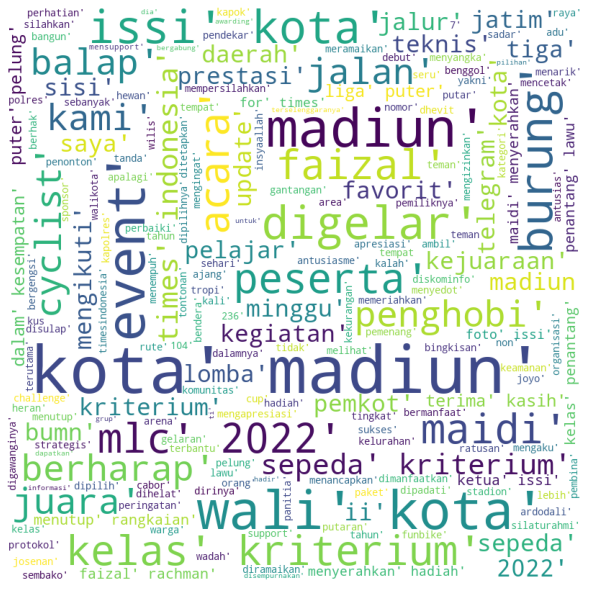

In [119]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv((input('Masukkan file: ')), encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.WordsStop:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()